# Analisando as Notas Em geral 

In [1]:
#pandas cria um dataframe.
import pandas as pd
notas = pd.read_csv('../DATA/ratings.csv') #leitura do arquivo csv.
#mostrar as 5 primeiras notas.
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [2]:
notas.shape #mostra total de linhas e colunas.

(100836, 4)

In [3]:
#renomear colunas.
notas.columns = ["usuarioId", "filmeId", "nota", "momento"]

In [4]:
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
notas["nota"].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [6]:
notas["nota"].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

In [7]:
notas["nota"].mean()

3.501556983616962

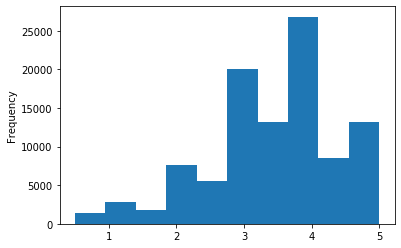

In [8]:
#explorar de maneira visual.
notas.nota.plot(kind="hist")

In [9]:
#uso da median
print("Média",notas.nota.mean())
print("Mediana",notas.nota.median())

Média 3.501556983616962
Mediana 3.5


In [10]:
notas.nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

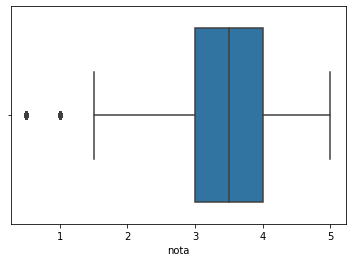

In [11]:
import seaborn as sns
sns.boxplot(notas.nota)

# Analisando Notas Por Filmes

In [12]:
filmes = pd.read_csv("../DATA/movies.csv")
filmes.columns = ["filmeId", "titulo", "generos"]
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [13]:
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [14]:
notas.query("filmeId==1").nota.mean() #faz um filtro

3.9209302325581397

In [15]:
notas.query("filmeId==2").nota.mean()

3.4318181818181817

In [16]:
notas.groupby("filmeId").head() #agrupa por filme id

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100823,610,160836,3.0,1493844794
100825,610,161634,4.0,1493848362
100827,610,163937,3.5,1493848789
100828,610,163981,3.5,1493850155


In [17]:
notas.groupby("filmeId").nota.mean().head()
media_por_filme = notas.groupby("filmeId").nota.mean()

In [18]:
media_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

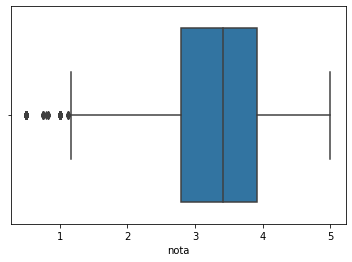

In [19]:
sns.boxplot(media_por_filme)

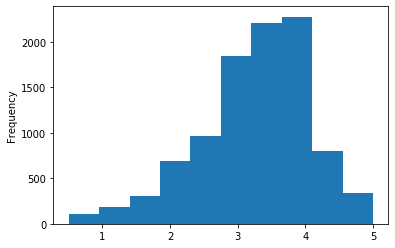

In [20]:
media_por_filme.plot(kind="hist")

In [21]:
media_por_filme.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: nota, dtype: float64

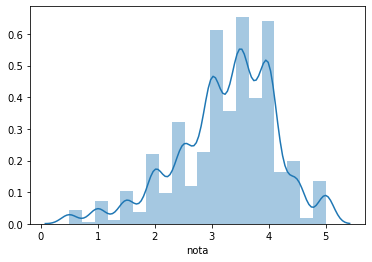

In [22]:
sns.distplot(media_por_filme, bins=20)

Text(0.5, 1.0, 'Histograma Das Médias dos Filmes')

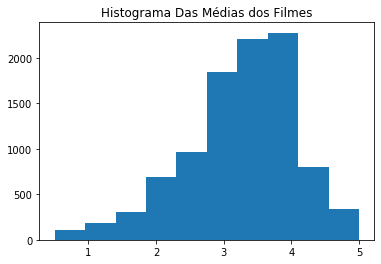

In [23]:
import matplotlib.pyplot as plt #usa em baixo nível para plotar um gráfico
plt.hist(media_por_filme)
plt.title("Histograma Das Médias dos Filmes")

# Movies TMDB 5000 Movies 

In [24]:
tmdb = pd.read_csv('../DATA/tmdb_5000_movies.csv')
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [25]:
tmdb.original_language.unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [26]:
contagem_de_linguas = tmdb["original_language"].value_counts().to_frame().reset_index() #criar dataframe com to_frame() reset_index cria duas colunas
contagem_de_linguas.columns= ["original_languages", "total"]
contagem_de_linguas

,original_languages,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27
5,hi,19
6,ja,16
7,it,14
8,cn,12
9,ru,11


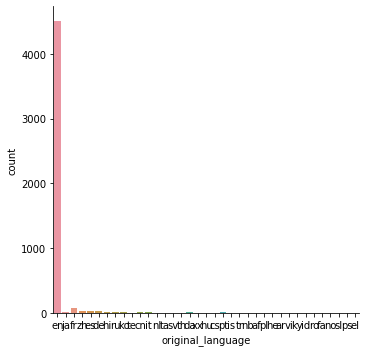

In [27]:
sns.catplot(x = "original_language", kind = "count", data = tmdb)

([<matplotlib.patches.Wedge at 0x2234bee2508>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'en'),
  Text(1.0355355017029462, -0.3710339940124459, 'fr'),
  Text(1.0579676486019882, -0.3011718023181785, 'es'),
  Text(1.0687996606645356, -0.26012936274741094, 'zh'),
  Text(1.0773191105706255, -0.22222406260195313, 'de'),
  Text(1.0835167978583342, -0.18971386021801853, 'hi'),
  Text(1.0875756432724297, -0.16486121484618815, 'ja'),
  Text(1.0906010773146022, -0.14348968659882622, 'it'),
  Text(1.092883487371409, -0.12492270822755745, 'cn'),
  Text(1.0946390911069936, -0.10846778425161549, 'ru'),
  Text(1.0960865535188649, -0.09270527058984593, 'ko'),
  Text(1.0972054830031333, -0.07835896928789601, 'pt'),
  Text(1.097965443340663, -0.06687215586282344, 'da'),
  Text(1.0984565010300316, -0.05825217030171998, 'sv'),
  Text(1.0987803851616647, -0.0517847968421653, 'fa'),
  Text(1.0990363161210686, -0.04603450713357274, 'nl'),
  Text(1.0992355702663055, -0.04100196411527794, 'he'),
  Text(

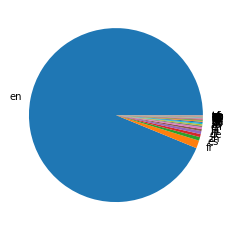

In [28]:
plt.pie(contagem_de_linguas.total, labels = contagem_de_linguas.original_languages)

In [29]:
total_por_lingua = tmdb["original_language"].value_counts()
total_geral = total_por_lingua.sum()
print(total_geral)
total_de_ingles = total_por_lingua.loc["en"]
total_do_resto = total_geral - total_de_ingles
print(total_de_ingles, total_do_resto)

4803
4505 298


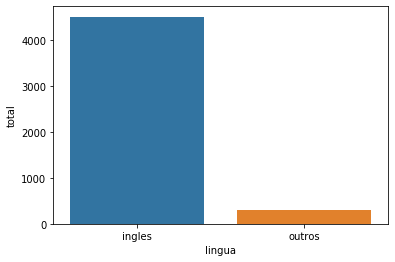

In [30]:
dados = {
    'lingua' : ["ingles", "outros"],
    'total': [total_de_ingles, total_do_resto]
}
dados = pd.DataFrame(dados)
sns.barplot(x="lingua", y="total", data=dados)

([<matplotlib.patches.Wedge at 0x2234c00bf88>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'ingles'),
  Text(1.0791697511565306, -0.2130555049482467, 'outros')])

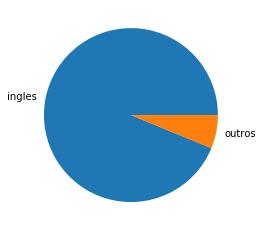

In [31]:
plt.pie(dados["total"], labels = dados["lingua"])

In [32]:
tmdb.query("original_language != 'en'").original_language.value_counts()
#linguas_sem_ingles = tmdb.query("original_language != 'en'").original_language
#print(linguas_sem_ingles)

fr    70
es    32
de    27
zh    27
hi    19
ja    16
it    14
cn    12
ko    11
ru    11
pt     9
da     7
sv     5
fa     4
nl     4
he     3
th     3
id     2
cs     2
ar     2
ta     2
ro     2
tr     1
sl     1
te     1
el     1
no     1
af     1
nb     1
hu     1
xx     1
ps     1
vi     1
is     1
ky     1
pl     1
Name: original_language, dtype: int64

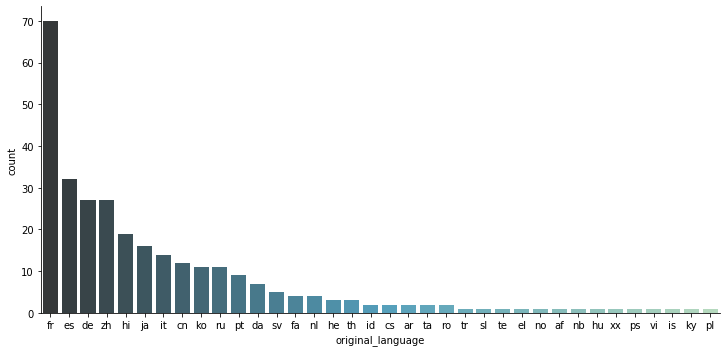

In [33]:
linguas_sem_ingles = tmdb.query("original_language != 'en'")
linguas_sem_ingles_contagem =  tmdb.query("original_language != 'en'").original_language.value_counts()
sns.catplot(x='original_language', data=linguas_sem_ingles, kind="count", aspect = 2, order = linguas_sem_ingles_contagem.index, palette="GnBu_d")

In [34]:
filmes.head(2)

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [35]:
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [36]:
notas_toy_story = notas.query("filmeId==1")
notas_jumanji = notas.query("filmeId==2")
print(len(notas_toy_story), len(notas_jumanji))

215 110


In [37]:
print("Notas toy story: %.2f" %notas_toy_story.nota.mean())
print("Notas jumaji: %.2f" %notas_jumanji.nota.mean())

Notas toy story: 3.92
Notas jumaji: 3.43


In [38]:
print("Notas toy story: %.2f" %notas_toy_story.nota.median())
print("Notas jumaji: %.2f" %notas_jumanji.nota.median())

Notas toy story: 4.00
Notas jumaji: 3.50


In [39]:
import numpy as np
np.array([2.5] * 10)
np.array([3.5] * 10)
filme1 = np.append(np.array([2.5] * 10), np.array([3.5] * 10))
np.array([5] * 10 )
np.array([1] * 10)
filme2 = np.append(np.array([5] * 10 ), np.array([1] * 10))
print(filme1.mean(), filme2.mean())
print(np.median(filme1), np.median(filme2))

3.0 3.0
3.0 3.0


(array([10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

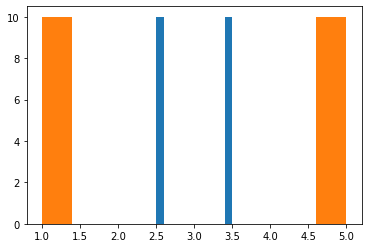

In [40]:
plt.hist(filme1)
plt.hist(filme2)

{'whiskers': [<matplotlib.lines.Line2D at 0x2234c23bf48>,
 'caps': [<matplotlib.lines.Line2D at 0x2234c23ee88>,
 'boxes': [<matplotlib.lines.Line2D at 0x2234c1eb308>,
 'medians': [<matplotlib.lines.Line2D at 0x2234c243dc8>,
 'fliers': [<matplotlib.lines.Line2D at 0x2234c243ec8>,
 'means': []}

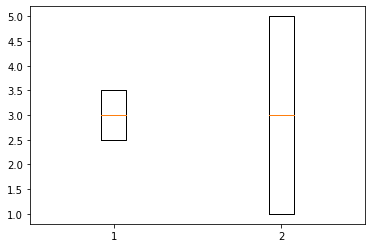

In [41]:
plt.boxplot([filme1, filme2])

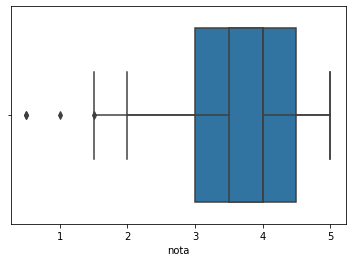

In [42]:
sns.boxplot(notas_toy_story.nota)
sns.boxplot(notas_jumanji.nota)

{'whiskers': [<matplotlib.lines.Line2D at 0x2234c33afc8>,
 'caps': [<matplotlib.lines.Line2D at 0x2234c33df48>,
 'boxes': [<matplotlib.lines.Line2D at 0x2234c2e0788>,
 'medians': [<matplotlib.lines.Line2D at 0x2234c342fc8>,
 'fliers': [<matplotlib.lines.Line2D at 0x2234c342f88>,
 'means': []}

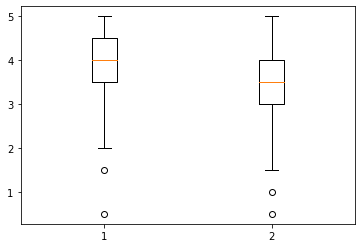

In [43]:
plt.boxplot([notas_toy_story.nota, notas_jumanji.nota])

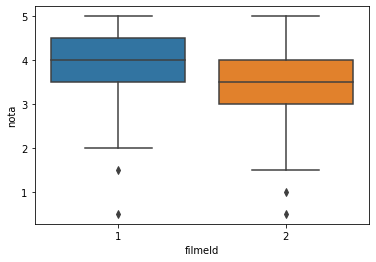

In [45]:
sns.boxplot(x="filmeId", y = "nota", data = notas.query("filmeId in [1,2]"))

In [47]:
notas_jumanji.nota.std()

0.8817134921476455

In [48]:
notas_toy_story.nota.std()

0.8348591407114045

In [52]:
print(filme1.std(),
filme2.std())

0.5 2.0
